In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.datasets import load_boston, make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
boston = load_boston()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
x

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [9]:
y = boston.target
len(y)

506

In [8]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=7)

In [11]:
len(x_train), len(y_train), len(x_test), len(y_test)

(379, 379, 127, 127)

### 선형

In [14]:
svr = SVR(kernel='linear', C=1.0, gamma='auto')
svr.fit(x_train, y_train)

SVR(gamma='auto', kernel='linear')

In [16]:
pred = svr.predict(x_test)

In [19]:
# 선형일 때만 가중치 뽑을 수 있음
print('가중치',svr.coef_)
print('절편', svr.intercept_)

가중치 [[ -3.22509621   3.07315598  -1.73050568   2.29435216  -2.04615997
   13.02708806  -1.80871473  -5.68595439   0.79861079  -3.97545159
   -6.35689867   3.14785882 -10.51014341]]
절편 [23.71073859]


In [23]:
print('mse', np.mean(np.square(y_test-pred)))
mse = mean_squared_error(y_test, pred)
print('mse', mse)

mse 33.399700591759846
mse 33.399700591759846


In [24]:
# mse에 루트
rmse = mean_squared_error(y_test, pred)**0.5
rmse

5.779247407038381

In [25]:
rmse1 = mean_squared_error(y_test, pred, squared=False)
rmse1

5.779247407038381

In [26]:
# R2 값
svr.score(x_test, y_test)

0.566592739739439

### 다항식

In [27]:
svr = SVR(kernel='poly', C=1.0, gamma='auto')
svr.fit(x_train, y_train)

SVR(gamma='auto', kernel='poly')

In [28]:
pred = svr.predict(x_test)

In [29]:
print('mse', mean_squared_error(y_test, pred))
print('rmse', mean_squared_error(y_test, pred, squared=False))

mse 69.08158820580269
rmse 8.311533444906702


### 가우시안

In [31]:
svr1 = SVR(kernel='rbf', C=1.0, gamma='auto')
svr1.fit(x_train, y_train)

SVR(gamma='auto')

In [32]:
pred1 = svr1.predict(x_test)

In [36]:
print('mse', mean_squared_error(y_test, pred1))
print('rmse', mean_squared_error(y_test, pred1, squared=False))
print('r2', svr1.score(x_test,y_test))

mse 51.30876442225444
rmse 7.163013641076948
r2 0.3341978933460811


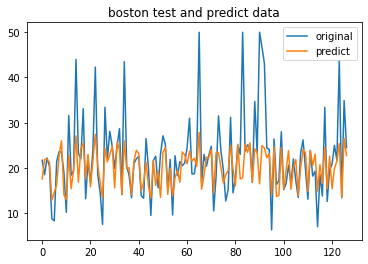

In [37]:
plt.plot(range(len(y_test)), y_test, label='original')
plt.plot(range(len(y_test)), pred1, label='predict')
plt.title('boston test and predict data')
plt.legend()
plt.show()

In [40]:
# grid search -> for문
kernel_list = ['linear', 'poly', 'rbf']

for kernel in kernel_list:
    svr = SVR(kernel=kernel, C=10, gamma='auto')
    svr.fit(x_train, y_train)
    pred = svr.predict(x_test)
    print('kernel', kernel)
    print('절편', svr.intercept_)
    print('mse', mean_squared_error(y_test, pred))
    print('rmse', mean_squared_error(y_test, pred, squared=False))
    print('r2', svr.score(x_test, y_test),'\n')

kernel linear
절편 [17.20160151]
mse 33.67521308421053
rmse 5.8030348167325805
r2 0.5630175845013686 

kernel poly
절편 [23.26108487]
mse 55.48595930454946
rmse 7.448889803490817
r2 0.27999301852883274 

kernel rbf
절편 [27.61561206]
mse 30.947863745912077
rmse 5.563080418788863
r2 0.5984087102762211 



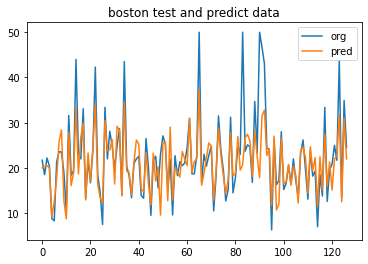

In [42]:
plt.plot(range(len(y_test)), y_test, label='org')
plt.plot(range(len(y_test)), pred, label='pred')
plt.title('boston test and predict data')
plt.legend()
plt.show()